# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('02-x_train-IEMOCAP-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('02-x_test-IEMOCAP-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('02-y_train-IEMOCAP-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('02-y_test-IEMOCAP-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)

In [3]:
x_train

,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,spectralFlux_sma3,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,...,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2bandwidth_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3bandwidth_sma3nz,F3amplitudeLogRelF0_sma3nz
1516,0.550053,-7.851800,15.903537,0.036933,-0.003562,0.202542,28.038530,-14.392128,21.499237,-10.632643,...,10.242093,707.808105,1232.899536,-80.775688,1712.241943,1073.216309,-86.732262,2688.523926,920.397949,-88.578697
602,0.268582,-13.223557,22.888321,0.017253,-0.002846,0.072490,29.461279,3.345391,19.835823,-8.335126,...,14.677291,615.641785,1341.745239,-97.127327,1632.324097,1065.154541,-104.506485,2701.830322,907.053040,-107.517441
518,0.257964,-7.856769,16.783792,0.013740,0.009768,0.069051,20.892841,-0.776871,19.555592,-5.960205,...,8.811817,592.482910,1322.476074,-132.927490,1544.822998,1075.153198,-137.887894,2574.113281,888.349548,-139.559494
2209,0.131380,-12.643758,23.016607,-0.007493,0.002672,0.033291,25.228651,1.379577,19.203630,-4.978724,...,3.333161,536.593567,1409.228149,-175.122360,1524.277344,1138.479248,-176.826843,2553.420410,1108.412109,-177.623947
1721,0.960153,-2.365955,11.661679,0.039753,-0.000313,0.395951,19.501293,-17.393946,11.897623,-18.749329,...,5.986082,757.639465,1337.688843,-92.532104,1718.021484,1095.973145,-94.381584,2702.448730,989.567627,-96.981438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.102714,-12.844368,20.696802,0.006191,-0.000033,0.020429,24.730604,3.961783,17.553076,-10.527103,...,5.856342,636.369507,1423.757568,-158.125610,1677.039429,1188.442749,-162.326111,2634.531250,1032.841309,-162.350204
1731,0.134119,-17.427670,26.202929,0.008741,-0.006540,0.027361,30.434385,1.428104,19.993570,-12.174898,...,16.571997,686.336060,1368.824585,-60.900349,1747.279785,1033.226685,-70.928970,2763.508789,966.669250,-73.436607
763,0.425805,-10.971887,20.394451,0.012249,-0.003465,0.135793,28.821161,-2.237694,18.211691,-11.256765,...,10.130011,541.355591,1303.519531,-108.097961,1520.017944,1032.616943,-110.971992,2595.402588,844.526855,-114.891777
835,0.084810,-13.789702,21.320992,-0.000025,0.006677,0.017291,25.605879,1.201977,23.603409,-7.546015,...,5.550917,608.902283,1421.750977,-148.870880,1643.862793,1232.202881,-154.884354,2580.996826,1020.791443,-154.421249


# **NORMALIZACION DE CARACTERISTICAS**

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_train)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [12]:
x_train_std

array([[ 1.09,  1.08, -1.27, ...,  0.91, -1.31,  1.1 ],
       [-0.11, -0.89,  0.92, ...,  1.12, -1.51,  0.57],
       [-0.15,  1.08, -1.  , ..., -0.89, -1.79, -0.33],
       ...,
       [ 0.56, -0.07,  0.14, ..., -0.56, -2.45,  0.36],
       [-0.89, -1.1 ,  0.43, ..., -0.78,  0.21, -0.74],
       [ 0.13,  0.67, -1.41, ...,  0.16, -1.38,  1.32]])

# **MODELO DE MARCHINE LEARNING**

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
clf.fit(x_train_std, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [14]:
y_predict = clf.predict(x_test_std)
y_predict

array([0, 2, 2, 3, 2, 2, 3, 3, 2, 1, 3, 3, 2, 2, 0, 3, 2, 0, 3, 2, 3, 2,
       2, 3, 3, 0, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 0, 3, 2,
       2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3,
       2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 1,
       3, 2, 2, 2, 2, 3, 2, 2, 1, 0, 2, 2, 2, 3, 3, 2, 2, 0, 2, 0, 2, 3,
       2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 0, 2, 3, 1, 1, 2, 2, 2, 3, 2, 0,
       2, 3, 2, 2, 0, 3, 3, 2, 1, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 1, 3, 2,
       2, 3, 2, 3, 2, 2, 1, 0, 3, 3, 0, 0, 2, 3, 3, 2, 3, 2, 2, 2, 0, 2,
       2, 2, 0, 0, 2, 2, 2, 1, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2,
       0, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 0, 2, 2, 3,
       3, 2, 0, 3, 2, 3, 0, 2, 2, 3, 0, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3,
       2, 2, 3, 3, 3, 2, 2, 2, 0, 2, 2, 3, 3, 3, 3,

# **EVALUACION**

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.55      0.62      0.58        53
           1       0.20      0.04      0.06        56
           2       0.69      0.77      0.73       238
           3       0.66      0.73      0.70       109

    accuracy                           0.66       456
   macro avg       0.53      0.54      0.52       456
weighted avg       0.61      0.66      0.62       456



In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.55      0.62      0.58        53
           1       0.20      0.04      0.06        56
           2       0.69      0.77      0.73       238
           3       0.66      0.73      0.70       109

    accuracy                           0.66       456
   macro avg       0.53      0.54      0.52       456
weighted avg       0.61      0.66      0.62       456

Matriz de confusión, sin normalización
[[ 33   4  15   1]
 [ 12   2  39   3]
 [ 14   3 184  37]
 [  1   1  27  80]]


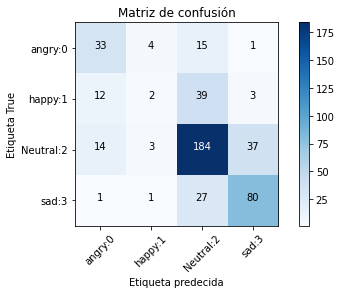

In [17]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')